<a href="https://colab.research.google.com/github/sayantikag98/Flipr-ML-Hackathon-7.0/blob/main/Flipr_Hackathon_7_0_Machine_Learning_Task_16_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Given:**

The dataset given contains the following:
*   Train set: IPL 2018 statistics along with the total runs scored in IPL 2019 of 100 players.

*   Test set: IPL 2019 statistics of 100 players. 


**Objective:**


*   The objective of the problem statement is to predict the total runs scored by each of the given player in IPL 2020. The output file should contain the player name and the total runs scored. 


**Procedure followed:**


1.   Hypothesis Formation - To predict the total runs scored by each player in the IPL season 2020 using a predictive machine learning model which would be trained on IPL 2018 statistics and tested on IPL 2019 statistics to predict IPL 2020 runs. From the problem statement it was understood that the problem was a regression problem.


2.   Importing data from the provided excel file as two pandas dataframe (df1 and df2).


3.   Data Exploration steps were performed which showed that there were no null values present explicitly in the given dataset but there were two columns which had "*" and "-" in them beacuse of which they were treated as objects and not int or float. Also the different feature columns varied in ranges.


4.   Then the train data set was split into the feature(X) and target(y) columns. The test set contained only the target columns. The above mentioned special characters were removed and "None" was inserted as null values inplace of them. After this only three null values were found in the batting average feature column and this was filled with the value of the previous Highest Run scored column.


5.   Data Transformation steps were performed. To address the issue of varied ranges in the different columns the data was standardized using Standard Scaler module and normalized using the MinMaxScaler module but later proceeded with standardized data because the density and the pair plot showed gaussian distribution.


6. Then again the data exploration part was done using the standardized data through plots like line plot, box plot, density plot and pair plot. No much outliers were observed in the data using the box plot. Density plot and pair plot majorly showed that the data follows gaussian distribution.


7.   Then the train set was divided into train and validation set which comprised of 20% of the train set.


8.   Then the model building steps were performed. Different models were trained on the training dataset and validated on the validation set. Regression based metrics were to compare the result. 


9.   The different models build are - Linear Regression, Lasso Regression, Ridge Regression, Bayesian Ridge Regression, Elastic Net CV, Stochastic Gradient Descent (SGD), Decision Tree, Random Forest, Ada Boost, Gradient Boosting, Extra Trees Regression, Extra Gradient Boosting, Support Vector Regressor (SVR), and finally Artificial Neural Network. 


10.   The different regression metrics used here were - Explained Variance Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Mean Squared Log Error, r squared Score, Adjusted r squared Score and the cross val score obtained from the Repeated K-Fold cross validation.


11.   When the values of different metrics were compared, Extra Gradient Boosting (xg boost) performed the best. It had the mean highest cross-validation score (0.99 (+/- 0.1)) (here k was taken as 10 and the repeats were taken as 3), the highest adjusted r squared score (approx 0.991764) and lowest root mean squared error value (approx 8.9302). Hyperparameter tuning was also performed but that did not show much improvement in performance. Feature selection was also done but that also did not show much improvement in performance. For the above result xgboost was chosen as the model of choice. The performance of the various model according the decreasing value of adjusted r square is XGBoost> Extra Trees> Random Forest> Gradient Boosting> Ada Boost> SVR> SGD> Ridge Regression> Bayesian Ridge Regression> Linear Regression> Elastic Net CV> Decision Tree> Lasso Regression. 


12.   Repeated K-fold cross validation was performed on xg boost model to check for any over-fitting issue. K was here taken as 5 and the number of repeats were taken as 3. The model performed equally well for all the iterations. 


13.   XGBoost was used for the final prediction of IPL 2020 total runs scored by each player from the given test set and was exported and saved as the final output excel file.

All the steps are indicated below in code as comments.


**Result Obtained:**

XGBoost performed the best among all the other models build, with the highest value of cross-validation and the adjusted r square score and the lowest error values (mean square, root mean square and mean absolute error). It was chosen as the model of choice to predict IPL 2020 runs and the final output file containing the names of the player and the predicted runs were generated.




























## For mounting google drive where the data is stored

In [306]:
from google.colab import drive   
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


## Importing Libraries 

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import f_regression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost 
from sklearn.svm import SVR
import keras
from keras.models import Sequential
from keras.layers import Dense


## Class body

In [308]:
class IPLRunPredict:

  def __init__(self):
    pass

  
########### STEP 2 ###############################################################################
## for loading the data

  def load_Data (self):
    path = "/content/drive/My Drive/Data.xlsx"     ## path where the file is stored
    df = pd.ExcelFile(path)                        ## to load the entire excel file 
    df1 = pd.read_excel(df, 'Train_Data')          ## to load the Train_Data page of the data excel file (First page)
    df2 = pd.read_excel(df, 'Test_Data')           ## to load the Test_Data page of the data excel file (Second page)
    return df1, df2

########## STEP 3 ###############################################################################
  ## for exploring the data

  def data_Exploration (self):
    df1,df2 = self.load_Data()
    print (f"The number of null values in each column of the train set are \n\n{df1.isna().sum()}")     ## to get the total null values in each column of the train and test set
    print (f"The number of null values in each column of the test set are \n\n{df2.isna().sum()}")  
    print (f"The description of each column of the train set are\n\n{df1.describe()}")                  ## to get the description of the train and the test set given
    print (f"The description of each column of the test set are\n\n{df2.describe()}")
    print (f"The type of each column of the train set are \n\n{df1.dtypes}")                            ## to get the type of each column of the train and the test set
    print (f"The type of each column of the test set are \n\n{df2.dtypes}")


########## STEP 4 ################################################################################
  # for splitting the data into feature(X) and target(y) columns

  def feature_Target_Split (self):
    data, data_1 = self.load_Data()
    X = data.iloc[:,:-1]            ## feature of the train set
    X_1 = data_1                    ## test set contains only the feature part
    y = data.iloc[:,-1]             ## label
    X['HS']=X['HS'].astype(str)      ## converting into string
    X_1['HS']=X_1['HS'].astype(str)  
    lis = X['HS']
    lis_1 = X_1['HS']

    def convert_HS(lis):            ## removes the "*" in the HS feature column
      new_lis=[]
      for i in lis:
        if(i[-1]=='*'):
          i=i[0:-1]
        new_lis.append(i)
      return new_lis 

    X['HS']=convert_HS(lis)
    X_1['HS']=convert_HS(lis_1)
    X['HS']=X['HS'].astype('int64')
    X_1['HS']=X_1['HS'].astype('int64')
    X['Avg']=X['Avg'].astype(str)
    X_1['Avg']=X_1['Avg'].astype(str)
    lis = X['Avg']
    lis_1 = X_1['Avg']

    def convert_Avg(lis):                ## removes the "*" in Avg column and was replaced with a null value
      new_lis=[]
      for i in lis:
        if(i=='-'):
          i=None
        new_lis.append(i)
      return new_lis 

    X['Avg']=convert_Avg(lis)
    X_1['Avg']=convert_Avg(lis_1)
    X['Avg']=X['Avg'].astype('float64')
    X_1['Avg']=X_1['Avg'].astype('float64')
    X['Avg'].fillna( value=X['HS'], inplace = True)      ## to replace the nan values of the train set with the corresponding values in HS column
    X_1['Avg'].fillna( value=X_1['HS'], inplace = True)    ## to replace the nan values of the test set with the corresponding values in HS column
    return X,X_1,y


  
############# STEP 5 #############################################################################
# Data Transformation step

  def standardization (self):
    X_train,X_test,y = self.feature_Target_Split()
    std = StandardScaler()
    X_train = std.fit_transform (X_train.iloc[:,1:])
    X_test = std.fit_transform (X_test.iloc[:,1:])
    return X_train, X_test, y
  

  def normalization (self):
    X_train,X_test,y = self.feature_Target_Split()
    minMax = MinMaxScaler()
    X_train = minMax.fit_transform (X_train.iloc[:,1:])
    X_test = minMax.fit_transform (X_test.iloc[:,1:])
    return X_train, X_test, y


############## STEP 6 #########################################################################

  def line_plot (self):
    X_train,X_test,y = self.standardization()
    df1,df2 = self.load_Data()
    df1=df1.iloc[:,1:-1]
    df=pd.DataFrame(X_train)
    col_list=df1.columns.values
    df.columns=col_list
    df.plot(subplots=True,linewidth=2.0,figsize=(30,30))
    plt.legend(loc='best')
    plt.show()


  def box_plot (self):
    X_train,X_test,y = self.standardization()
    df1,df2 = self.load_Data()
    df1=df1.iloc[:,1:-1]
    df=pd.DataFrame(X_train)
    col_list=df1.columns.values
    df.columns=col_list
    df.boxplot(figsize=(15,15),grid=True)
    plt.show()


  def density_plot(self):
    X_train,X_test,y = self.standardization()
    df1,df2 = self.load_Data()
    df1=df1.iloc[:,1:-1]
    df=pd.DataFrame(X_train)
    col_list=df1.columns.values
    df.columns=col_list
    df.plot(subplots=True,kind='density',figsize=(30,30))
    plt.legend(loc='best')
    plt.show()


  def pair_plot (self):
    X_train,X_test,y = self.standardization()
    df1,df2 = self.load_Data()
    df1=df1.iloc[:,1:-1]
    df=pd.DataFrame(X_train)
    col_list=df1.columns.values
    df.columns=col_list
    sns.pairplot(df,diag_kind='kde')
    plt.show()



############ STEP 7 #############################################################################

  def train_Val_Test_Split (self):
    X_train,X_test,y = self.standardization()
    X_train, X_val, y_train, y_val = train_test_split(X_train,y,test_size=0.2,random_state=27)
    return X_train,X_val,y_train,y_val,X_test


## Feature selection and hyperparameter tuning did not show much improvement in performance
  def feature_selection (self):                          
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
    print(f_regression(X_train, y_train, center=True))


############ STEPS 8-13 #######################################################################

## the regression metric used here
  def regression_metric (self, X_val, y_val, y_pred):    
    explained_Variance_Score = explained_variance_score(y_val, y_pred)
    mean_Absolute_Error = mean_absolute_error(y_val,y_pred)
    mean_Squared_Error = mean_squared_error(y_val,y_pred)
    root_Mean_Squared_Error = mean_Squared_Error**(1/2)
    mean_Squared_Log_Error = mean_squared_log_error(y_val,y_pred)
    r2_Score = r2_score(y_val, y_pred)
    ### to calculate the adjusted r^2 score from the formula given in theory 
    adjusted_r_squared = 1 - (1-r2_Score)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
    return explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared 



## LINEAR REGRESSION ##
  def linearRegression (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    reg = LinearRegression().fit(X_train, y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of linear regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=reg.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = reg.score(X_train,y_train)
    score_val = reg.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=reg.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## RIDGE REGRESSION ##
  def ridge (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    rid = Ridge().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(rid, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of ridge regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=rid.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = rid.score(X_train,y_train)
    score_val = rid.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=rid.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## BAYESIAN RIDGE REGRESSION ##
  def bayesian_ridge (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    bay = BayesianRidge().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(bay, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of bayesian ridge regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=bay.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = bay.score(X_train,y_train)
    score_val = bay.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=bay.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared,scores_mean]
    return df_1, lis


## LASSO REGRESSION ##
  def lasso (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    las = Lasso().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(las, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of lasso regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=las.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = las.score(X_train,y_train)
    score_val = las.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=las.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## ELASTIC NET CV ##
  def elastic_netCV (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    ela = ElasticNetCV().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(ela, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of elastic net: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=ela.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = ela.score(X_train,y_train)
    score_val = ela.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=ela.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis
  

## STOCHASTIC GRADIENT DESCENT ##
  def sgd_regressor (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    sgd = SGDRegressor().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(sgd, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of sgd regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=sgd.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = sgd.score(X_train,y_train)
    score_val = sgd.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=sgd.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## DECISION TREE ##
  def decision_tree_regressor (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    dec = DecisionTreeRegressor().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(dec, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of decision tree regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=dec.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = dec.score(X_train,y_train)
    score_val = dec.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print(f"The decision path is {dec.decision_path(X_val)}")
    # print(f"The depth of the tree is {dec.get_depth()}")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=dec.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## ADA BOOST ##
  def ada_boost (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    ada = AdaBoostRegressor(DecisionTreeRegressor()).fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(ada, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of ada boost: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=ada.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = ada.score(X_train,y_train)
    score_val = ada.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=ada.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## RANDOM FOREST ##
  def random_forest_regressor (self):                                     ## Bagging technique
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    ran = RandomForestRegressor().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(ran, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of random forest regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=ran.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = ran.score(X_train,y_train)
    score_val = ran.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=ran.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## EXTRA TREES REGRESSION ##
  def extra_tree_regressor (self):                                     
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    ext = ExtraTreesRegressor().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(ext, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of extra trees regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=ext.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = ext.score(X_train,y_train)
    score_val = ext.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print(f"The decision path is {ext.decision_path(X_val)}")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans=ext.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## GRADIENT BOOSTING ##
  def gradient_boosting_regressor (self):                                     ## Boosting technique
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    gra = GradientBoostingRegressor().fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(gra, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of gradient boosting regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=gra.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = gra.score(X_train,y_train)
    score_val = gra.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans = gra.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## XG BOOST ##
## This model performed the best among others. Had lowest error values and highest adjusted r square values.

  def xg_boost_regressor (self):                                     ## Boosting technique
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    eval_set = [(X_train, y_train), (X_val, y_val)]
    xgb = xgboost.XGBRegressor(objective='reg:squarederror',random_state=42,learning_rate = 0.1, n_estimators= 100, max_depth= 3, subsample= 0.8, colsample_bytree= 1, gamma= 1).fit(X_train,y_train, eval_metric="rmse", eval_set=eval_set, verbose=False, early_stopping_rounds=42)
    results_1 = xgb.evals_result()
    # print(results_1)
    epochs = len(results_1['validation_0']['rmse'])
    x_axis = range(0, epochs)
    # plotting rmse error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results_1['validation_0']['rmse'], label='Train')
    ax.plot(x_axis, results_1['validation_1']['rmse'], label='Test')
    ax.legend()
    plt.ylabel('RMS Error')
    plt.title('XGBoost Regression Error')
    plt.show()
    cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
    scores = cross_val_score(xgb, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of extra gradient boosting regressor: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))
    y_pred=xgb.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = xgb.score(X_train,y_train)
    score_val = xgb.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans = xgb.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## SUPPORT VECTOR REGRESSOR ##
  def svm_svr (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    svr = SVR(C=100,kernel='rbf').fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv)
    scores_mean =scores.mean()
    # print("Cross validation score of Support Vector Regressor: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred=svr.predict(X_val).astype(int)
    df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
    # print ("The table showing both the actual and the predicted values:\n")
    # print (df)
    score_train = svr.score(X_train,y_train)
    score_val = svr.score(X_val,y_val)
    explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
    # print ("\n")
    # print (f"The score of the training set is {score_train}")
    # print (f"The score of the validation set is {score_val}")
    # print (f"The explained variance score is {explained_Variance_Score}")
    # print (f"The mean absolute error is {mean_Absolute_Error}")
    # print (f"The mean squared error is {mean_Squared_Error}")
    # print (f"The root mean squared error is {root_Mean_Squared_Error}")
    # print (f"The mean squared log error is {mean_Squared_Log_Error}")
    # print (f"The r squared score is {r2_Score}")
    # print (f"The adjusted r squared score is {adjusted_r_squared}")
    y_pred_ans = svr.predict(X_test).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    lis = [explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared, scores_mean]
    return df_1, lis


## This method assembles all the result obtained above into one dataframe

  def result_table (self):
    df,lis1=self.linearRegression()
    df,lis2=self.ridge()
    df,lis3=self.bayesian_ridge()
    df,lis4=self.lasso()
    df,lis5=self.elastic_netCV()
    df,lis6=self.sgd_regressor()
    df,lis7=self.decision_tree_regressor()
    df,lis8=self.ada_boost()
    df,lis9=self.random_forest_regressor()
    df,lis10=self.extra_tree_regressor()
    df,lis11=self.gradient_boosting_regressor()
    df,lis12=self.xg_boost_regressor()
    df,lis13=self.svm_svr()
    df_result = pd.DataFrame(['explained_Variance_Score', 'mean_Absolute_Error', 'mean_Squared_Error', 'root_Mean_Squared_Error', 'mean_Squared_Log_Error', 'r2_Score', 'adjusted_r_squared', 'cross_validation_score'],index=None)
    df_result['Linear'] = lis1
    df_result['Ridge'] = lis2
    df_result['Bayesian Ridge'] = lis3
    df_result['Lasso'] = lis4
    df_result['ElaticNetCV'] = lis5
    df_result['SGD'] = lis6
    df_result['Decision Tree'] = lis7
    df_result['Ada Boost'] = lis8
    df_result['Random Forest'] = lis9
    df_result['Extra Trees'] = lis10
    df_result['Gradient Boosting'] = lis11
    df_result['XGB'] = lis12
    df_result['SVR'] = lis13
    df_result.set_index([0],inplace=True)
    df_result=df_result.transpose()
    lis = df_result.index.values
    df_result.insert(0,"Model name",lis)
    df_result.reset_index(drop=True, inplace=True)
    df_result.sort_values(by='adjusted_r_squared', inplace=True, ignore_index=True,ascending=False)  
    return df_result


## From the result dataframe bar plot showing the result of the various models using the metrics was plotted 

  def result_plot (self):
    df=self.result_table()
    import warnings
    warnings.filterwarnings("ignore")
    s="mean_Squared_Log_Error "*len(df['root_Mean_Squared_Error'])
    li_1=s.strip().split(" ")
    s="adjusted_r_squared "*len(df['root_Mean_Squared_Error'])
    li_2=s.strip().split(" ")
    s="cross_validation_score "*len(df['root_Mean_Squared_Error'])
    li_3=s.strip().split(" ")
    df_1=df[['Model name','mean_Squared_Log_Error']]
    df_1.rename(columns={"mean_Squared_Log_Error": "Metric score"},inplace=True)
    df_1['Metric Name']=li_1
    df_2=df[['Model name','adjusted_r_squared']]
    df_2.rename(columns={"adjusted_r_squared": "Metric score"},inplace=True)
    df_2['Metric Name']=li_2
    df_3=df[['Model name','cross_validation_score']]
    df_3.rename(columns={"cross_validation_score": "Metric score"},inplace=True)
    df_3['Metric Name']=li_3
    df_com = pd.concat([df_1, df_2, df_3])    
    fig_dims = (20,20)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(x="Model name", y="Metric score", hue="Metric Name", ax=ax, data=df_com)




 ##  This method uses cross-validation for xg boost and shows the result  
  def xg_cv (self):                                    
    X,X_t,y = self.standardization()
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    max=0
    for train, test in rkf.split(X,y):
      X_train=X[train]
      X_val=X[test]
      y_train=y[train]
      y_val=y[test]
      eval_set = [(X_train, y_train), (X_val, y_val)]
      xgb = xgboost.XGBRegressor(objective='reg:squarederror',random_state=42,learning_rate = 0.1, n_estimators= 100, max_depth= 3, subsample= 0.8, colsample_bytree= 1, gamma= 1).fit(X_train,y_train, eval_metric="rmse", eval_set=eval_set, verbose=False, early_stopping_rounds=42)
      results_1 = xgb.evals_result()
      print(results_1)
      epochs = len(results_1['validation_0']['rmse'])
      x_axis = range(0, epochs)
      # plotting rmse error
      fig, ax = plt.subplots()
      ax.plot(x_axis, results_1['validation_0']['rmse'], label='Train')
      ax.plot(x_axis, results_1['validation_1']['rmse'], label='Test')
      ax.legend()
      plt.ylabel('RMS Error')
      plt.title('XGBoost Regression Error')
      plt.show()
      scores = cross_val_score(xgb, X_train, y_train, scoring='r2', cv=rkf)
      print("Cross validation score: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))
      y_pred=xgb.predict(X_val).astype(int)
      df=pd.DataFrame({'Actual_values': y_val, 'Predicted_values': y_pred})
      print ("The table showing both the actual and the predicted values:\n")
      print (df)
      score_train = xgb.score(X_train,y_train)
      score_val = xgb.score(X_val,y_val)
      explained_Variance_Score, mean_Absolute_Error, mean_Squared_Error, root_Mean_Squared_Error, mean_Squared_Log_Error, r2_Score, adjusted_r_squared = self.regression_metric(X_val, y_val, y_pred)
      print ("\n")
      print (f"The score of the training set is {score_train}")
      print (f"The score of the validation set is {score_val}")
      print (f"The explained variance score is {explained_Variance_Score}")
      print (f"The mean absolute error is {mean_Absolute_Error}")
      print (f"The mean squared error is {mean_Squared_Error}")
      print (f"The root mean squared error is {root_Mean_Squared_Error}")
      print (f"The mean squared log error is {mean_Squared_Log_Error}")
      print (f"The r squared score is {r2_Score}")
      print (f"The adjusted r squared score is {adjusted_r_squared}")
      if (max<adjusted_r_squared):
        max = adjusted_r_squared
        xgb_m = xgb
    print (max)
    y_pred_ans = xgb_m.predict(X_t).astype(int)
    df_1=pd.DataFrame({'Predicted_values_Answer': y_pred_ans})
    return df_1
    

## ARTIFICIAL NEURAL NETWORK ##
## ann model was build here ##

  def ann (self):
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    # Artificial Neural network
    model = Sequential()
    model.add(Dense(12, input_dim=12, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model


## the ann model was fitted with the train set and validated with the validation set

  def ann_1 (self):
    model=self.ann()
    X_train,X_val,y_train,y_val,X_test = self.train_Val_Test_Split()
    history = model.fit(X_train, y_train, epochs=150,  verbose=1, validation_split=0.2)
    print(history.history.keys())
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    print(hist)
    # Plot of Error vs Epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    y_pred = model.evaluate(X_val,y_val,verbose=1)
    print(y_pred)

## Creating an object of IPLRunPredict class

In [309]:
ipl = IPLRunPredict()

## Calling the various methods of IPLRunPredict class

In [310]:
df1,df2=ipl.load_Data()

In [311]:
ipl.data_Exploration()

The number of null values in each column of the train set are 

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64
The number of null values in each column of the test set are 

PLAYER       0
Mat          0
Inns         0
NO           0
2019_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
dtype: int64
The description of each column of the train set are

              Mat        Inns          NO  ...          4s          6s  2019_Runs
count  100.000000  100.000000  100.000000  ...  100.000000  100.000000   100.0000
mean    10.420000    8.600000    1.790000  ...   16.390000    8.680000   184.2600
std      4.472542    4.572646    1.683521  ...   17.852875    9.382856   173.3093
min      1.000000    1.000000    0.000000  ...    0.000000   

In [312]:
ipl.feature_Target_Split()

(               PLAYER  Mat  Inns  NO  2018_Runs  ...      SR  100  50  4s  6s
 0         Aaron Finch   10     9   1        134  ...  134.00    0   0   6   8
 1      AB de Villiers   12    11   2        480  ...  174.54    0   6  39  30
 2     Abhishek Sharma    3     3   2         63  ...  190.90    0   0   3   5
 3      Ajinkya Rahane   15    14   1        370  ...  118.21    0   1  39   5
 4          Alex Hales    6     6   0        148  ...  125.42    0   0  13   6
 ..                ...  ...   ...  ..        ...  ...     ...  ...  ..  ..  ..
 95        Virat Kohli   14    14   3        530  ...  139.10    0   4  52  18
 96  Washington Sundar    7     6   3         65  ...  171.05    0   0   5   4
 97    Wriddhiman Saha   11    10   2        122  ...  119.60    0   0  17   1
 98       Yusuf Pathan   15    13   4        260  ...  130.00    0   0  22  11
 99       Yuvraj Singh    8     6   0         65  ...   89.04    0   0   6   2
 
 [100 rows x 13 columns],
                PLAYER  

In [313]:
ipl.standardization()

(array([[-0.0943794 ,  0.0879174 , -0.47161868, ..., -0.61812154,
         -0.58491099, -0.07283771],
        [ 0.35504632,  0.52750438,  0.12536699, ...,  3.0538876 ,
          1.27284288,  2.28367643],
        [-1.66736942, -1.23084355,  0.12536699, ..., -0.61812154,
         -0.75379771, -0.39418055],
        ...,
        [ 0.13033346,  0.30771089,  0.12536699, ..., -0.61812154,
          0.0343403 , -0.82263766],
        [ 1.0291849 ,  0.96709136,  1.31933833, ..., -0.61812154,
          0.31581816,  0.24850513],
        [-0.54380512, -0.57146308, -1.06860435, ..., -0.61812154,
         -0.58491099, -0.71552338]]),
 array([[ 0.42086603,  0.7921995 ,  0.08710071, ...,  4.37491513,
          2.42026832,  1.46311199],
        [ 0.8525235 ,  1.2147059 ,  0.63148016, ...,  3.11413267,
          1.94289784,  1.90715205],
        [ 1.28418097,  1.6372123 , -0.45727873, ...,  1.85335021,
          1.7042126 ,  1.90715205],
        ...,
        [-1.52159258, -1.5315857 , -1.00165818, ..., -

In [314]:
ipl.normalization()

(array([[0.5625    , 0.5       , 0.11111111, ..., 0.        , 0.08823529,
         0.21621622],
        [0.6875    , 0.625     , 0.22222222, ..., 0.75      , 0.57352941,
         0.81081081],
        [0.125     , 0.125     , 0.22222222, ..., 0.        , 0.04411765,
         0.13513514],
        ...,
        [0.625     , 0.5625    , 0.22222222, ..., 0.        , 0.25      ,
         0.02702703],
        [0.875     , 0.75      , 0.44444444, ..., 0.        , 0.32352941,
         0.2972973 ],
        [0.4375    , 0.3125    , 0.        , ..., 0.        , 0.08823529,
         0.05405405]]),
 array([[0.6875    , 0.6875    , 0.25      , ..., 1.        , 0.890625  ,
         0.40384615],
        [0.8125    , 0.8125    , 0.375     , ..., 0.75      , 0.765625  ,
         0.48076923],
        [0.9375    , 0.9375    , 0.125     , ..., 0.5       , 0.703125  ,
         0.48076923],
        ...,
        [0.125     , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.3

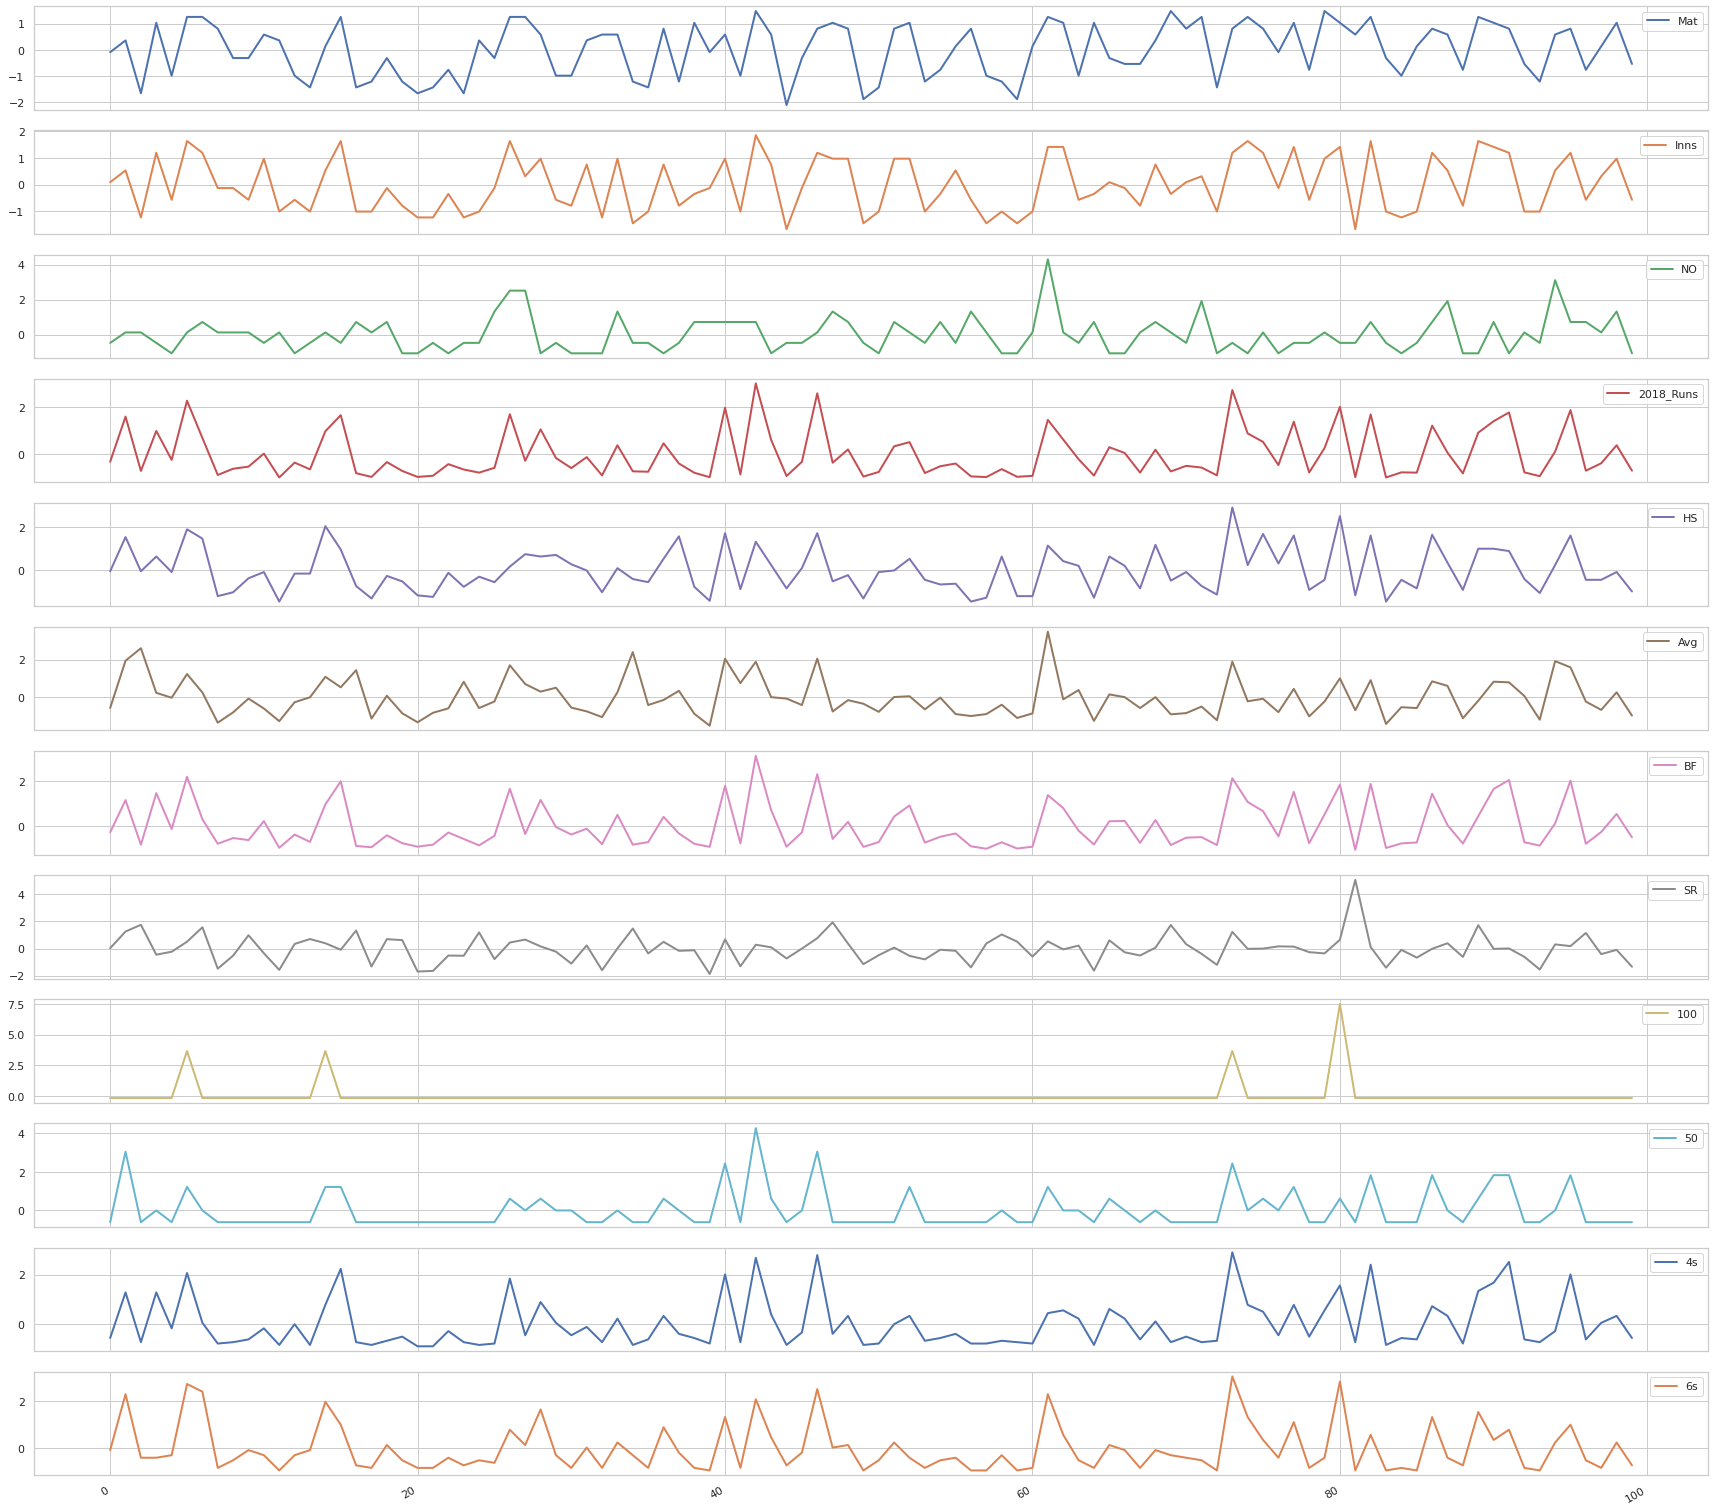

In [315]:
ipl.line_plot()

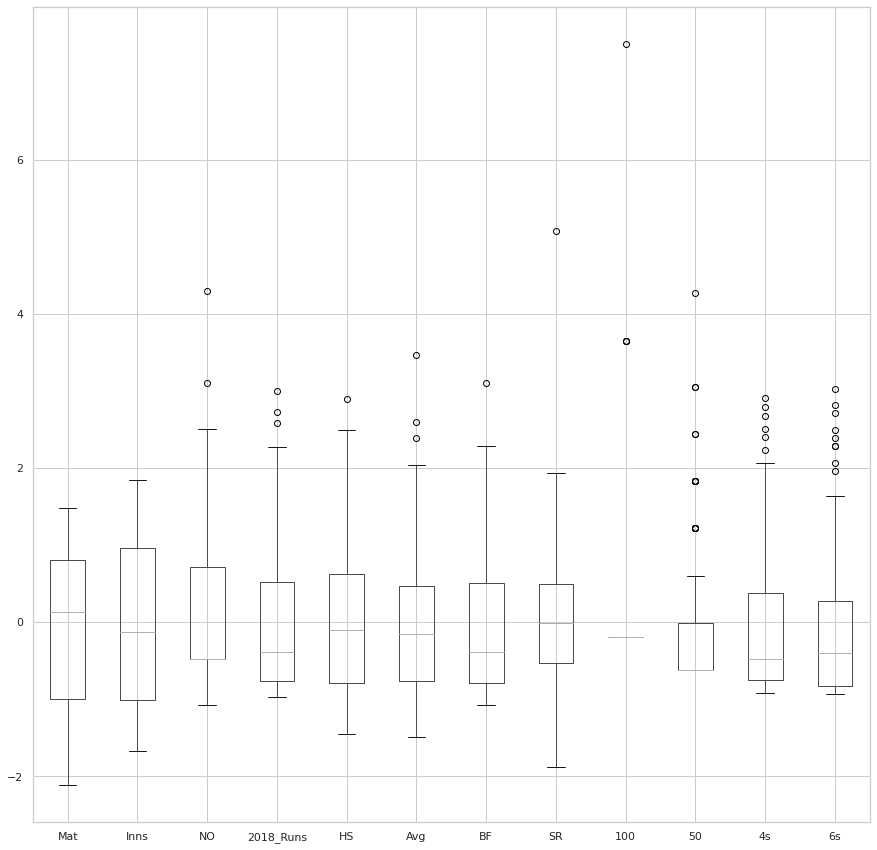

In [316]:
ipl.box_plot()

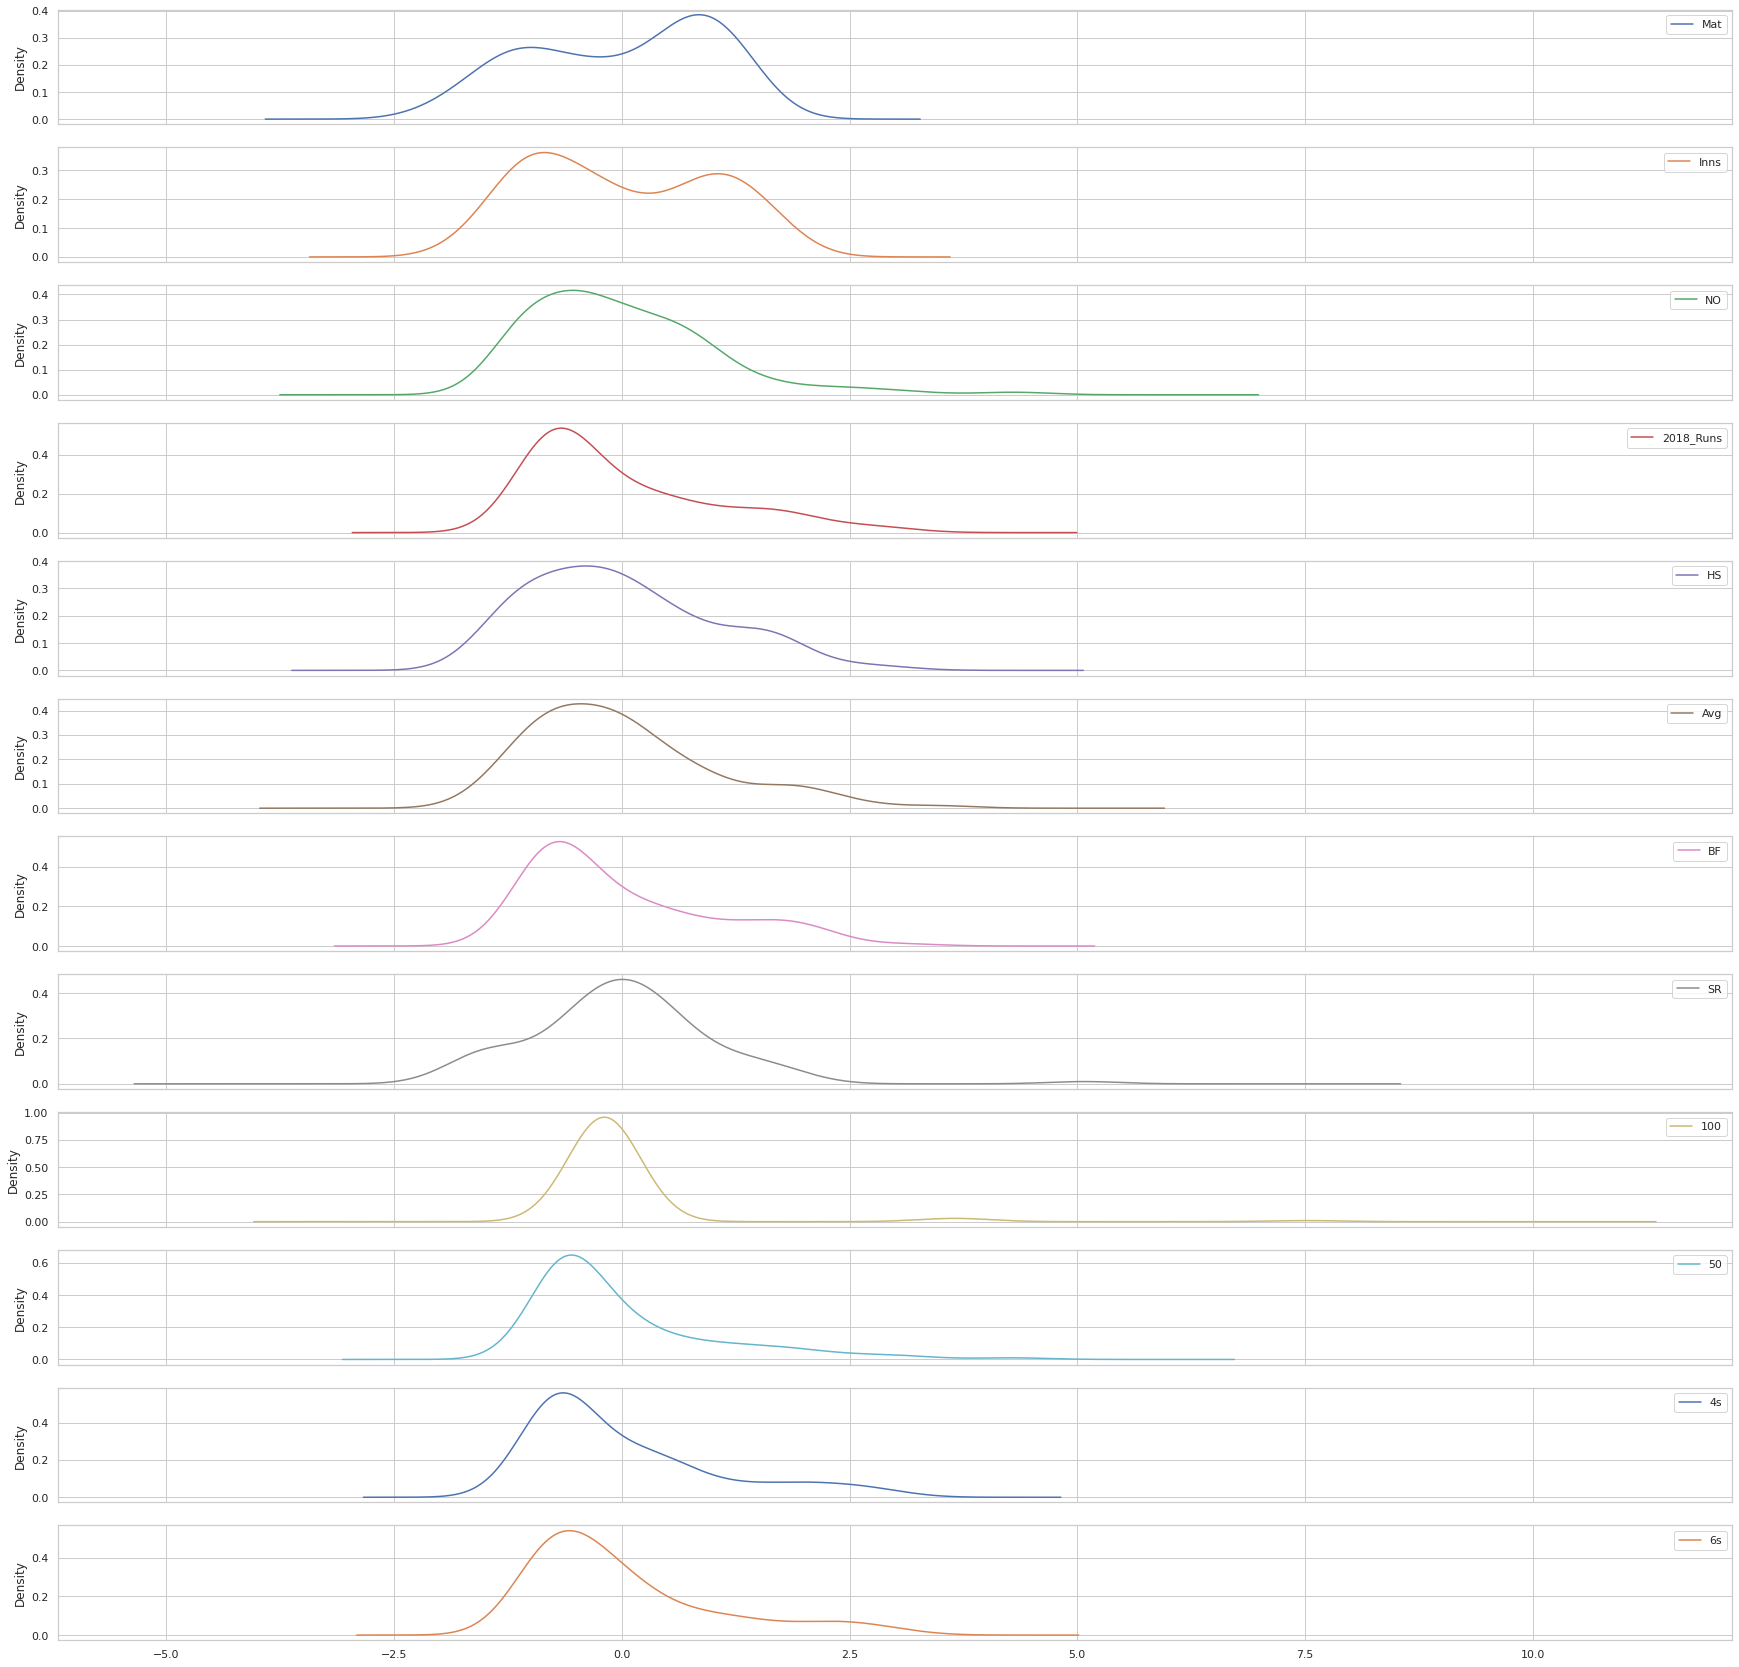

In [317]:
ipl.density_plot()

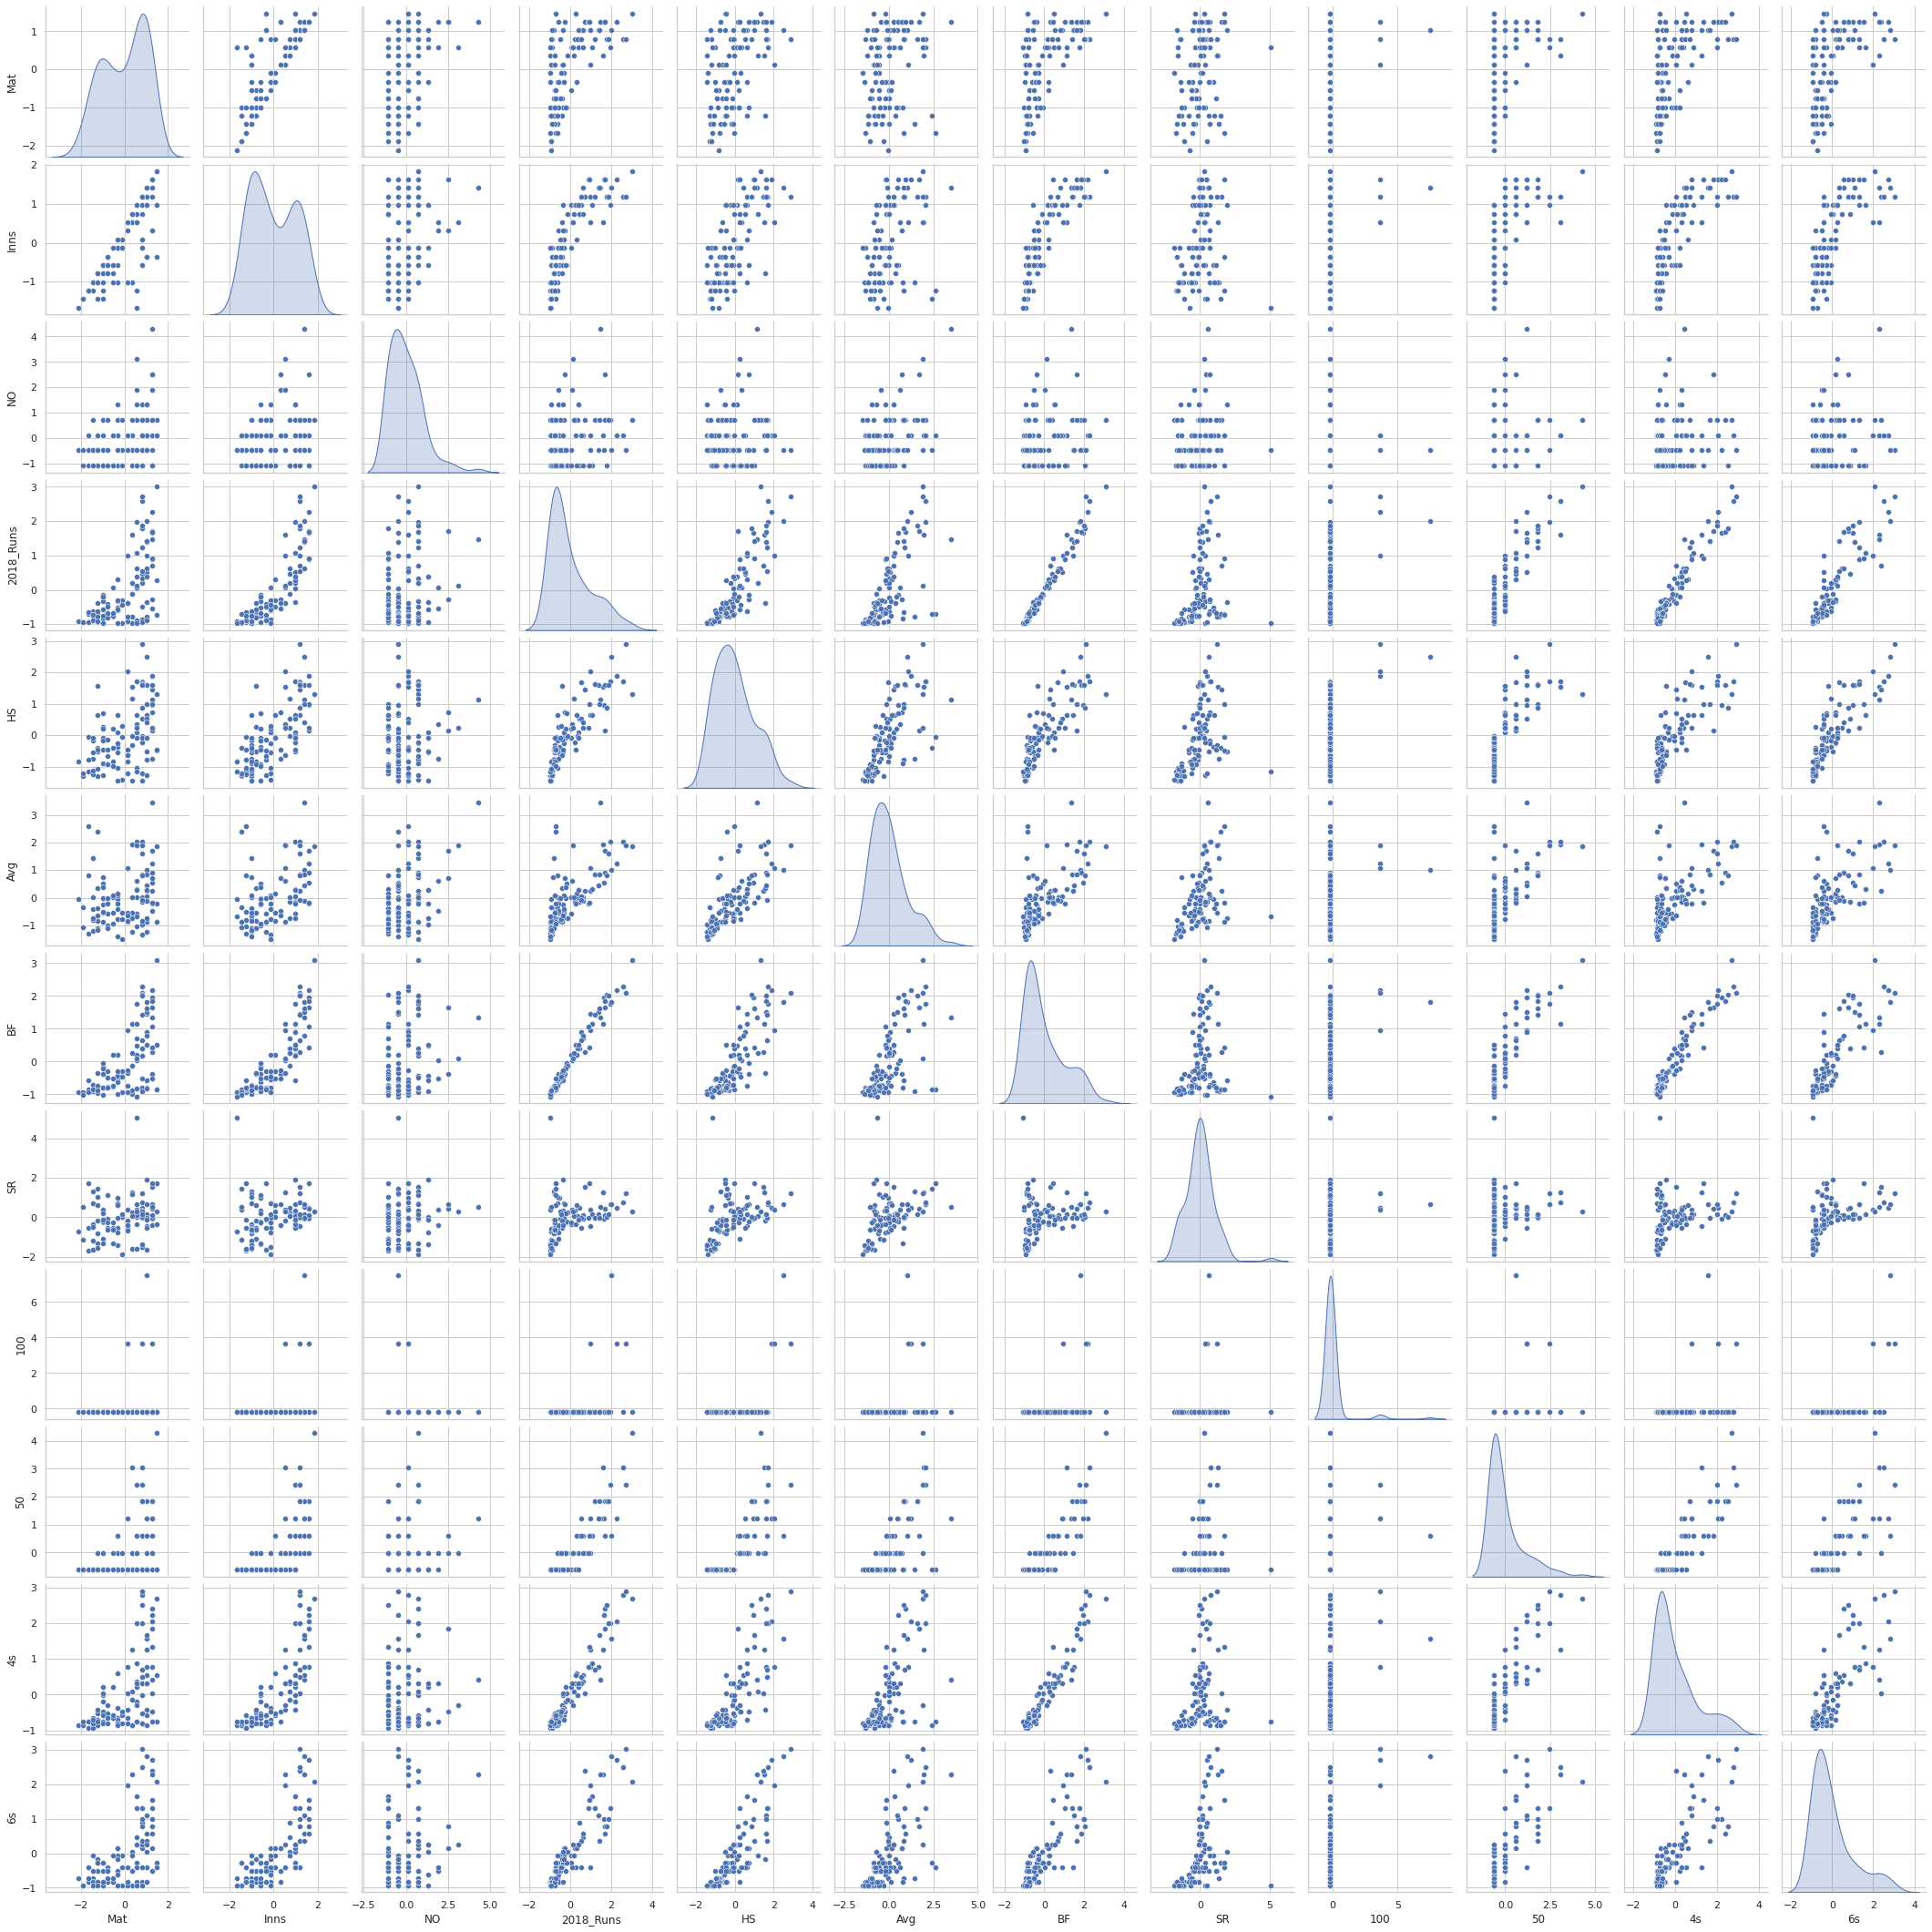

In [318]:
ipl.pair_plot()

In [319]:
ipl.train_Val_Test_Split()

(array([[ 1.02918490e+00,  1.40667834e+00,  7.22352659e-01,
          1.40872790e+00,  9.90779629e-01,  8.31859298e-01,
          1.63426408e+00, -2.19596457e-02, -1.92450090e-01,
          1.82988455e+00,  1.66691188e+00,  3.55619406e-01],
        [ 1.02918490e+00,  9.67091361e-01,  1.31933833e+00,
         -3.48463779e-01, -5.17474971e-01, -7.42177398e-01,
         -5.87113310e-01,  1.93768021e+00, -1.92450090e-01,
         -6.18121537e-01, -4.16024276e-01,  3.42765693e-02],
        [-3.19092261e-01, -1.31876095e-01,  7.22352659e-01,
         -3.20921590e-01, -2.66099204e-01,  8.98523980e-02,
         -4.23776738e-01,  6.93097517e-01, -1.92450090e-01,
         -6.18121537e-01, -6.97502134e-01,  1.41390848e-01],
        [-1.21794370e+00, -1.01105006e+00, -4.71618678e-01,
         -9.15832878e-01, -1.05613733e+00, -1.17456009e+00,
         -8.81119141e-01, -1.55183524e+00, -1.92450090e-01,
         -6.18121537e-01, -7.53797706e-01, -9.29751941e-01],
        [ 5.79759179e-01,  5.2750437

In [320]:
ipl.feature_selection()

                            OLS Regression Results                            
Dep. Variable:              2019_Runs   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     467.4
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.32e-59
Time:                        16:20:46   Log-Likelihood:                -348.99
No. Observations:                  80   AIC:                             724.0
Df Residuals:                      67   BIC:                             754.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.8773      2.369     77.620      0.0

In [321]:
ipl.linearRegression()

(    Predicted_values_Answer
 0                       613
 1                       564
 2                       529
 3                       500
 4                       441
 ..                      ...
 95                       -2
 96                       23
 97                      -11
 98                        0
 99                      -12
 
 [100 rows x 1 columns],
 [0.9756837009290007,
  20.3,
  644.9,
  25.394881374009213,
  0.05558319169504966,
  0.9754645597664244,
  0.9334038050802949,
  0.9734453150367615])

In [322]:
ipl.ridge()

(    Predicted_values_Answer
 0                       601
 1                       555
 2                       521
 3                       510
 4                       451
 ..                      ...
 95                       -6
 96                       15
 97                      -14
 98                        1
 99                      -16
 
 [100 rows x 1 columns],
 [0.9781624499905885,
  19.35,
  574.05,
  23.959340558537914,
  0.08736072927561614,
  0.9781600721567932,
  0.9407201958541531,
  0.9732407413636203])

In [323]:
ipl.bayesian_ridge()

(    Predicted_values_Answer
 0                       605
 1                       559
 2                       524
 3                       506
 4                       447
 ..                      ...
 95                       -4
 96                       18
 97                      -13
 98                        0
 99                      -15
 
 [100 rows x 1 columns],
 [0.9774038258965313,
  19.65,
  594.65,
  24.38544647940652,
  0.06964483101876927,
  0.9773763381378575,
  0.9385929178027561,
  0.973731956620155])

In [324]:
ipl.lasso()

(    Predicted_values_Answer
 0                       611
 1                       566
 2                       524
 3                       501
 4                       436
 ..                      ...
 95                       -4
 96                       28
 97                      -11
 98                        0
 99                      -11
 
 [100 rows x 1 columns],
 [0.9720965008653888,
  21.55,
  736.15,
  27.13208432833718,
  0.07466383659424657,
  0.9719929224252649,
  0.9239807894400047,
  0.976218649532621])

In [325]:
ipl.elastic_netCV()

(    Predicted_values_Answer
 0                       588
 1                       544
 2                       500
 3                       511
 4                       470
 ..                      ...
 95                      -11
 96                       16
 97                      -14
 98                        8
 99                      -16
 
 [100 rows x 1 columns],
 [0.9752781375968718,
  21.9,
  674.8,
  25.97691282658507,
  0.1956311038899892,
  0.9743270040787458,
  0.9303161539280245,
  0.9643920613543906])

In [326]:
ipl.sgd_regressor()

(    Predicted_values_Answer
 0                       594
 1                       548
 2                       516
 3                       520
 4                       460
 ..                      ...
 95                       -9
 96                        5
 97                      -17
 98                        4
 99                      -20
 
 [100 rows x 1 columns],
 [0.9788754196757757,
  18.75,
  561.75,
  23.701265788982663,
  0.26600417392288966,
  0.9786280298477111,
  0.9419903667295016,
  0.9710923116490383])

In [327]:
ipl.decision_tree_regressor()

(    Predicted_values_Answer
 0                       593
 1                       529
 2                       464
 3                       521
 4                       464
 ..                      ...
 95                        9
 96                       10
 97                        9
 98                        9
 99                        9
 
 [100 rows x 1 columns],
 [0.9704406725236835,
  20.6,
  933.2,
  30.548322376196047,
  0.017661579116392444,
  0.9644960880353967,
  0.9036322389532195,
  0.9645787720807554])

In [328]:
ipl.ada_boost()

(    Predicted_values_Answer
 0                       692
 1                       529
 2                       510
 3                       510
 4                       424
 ..                      ...
 95                       14
 96                       14
 97                       14
 98                       12
 99                       14
 
 [100 rows x 1 columns],
 [0.990927708050708,
  12.6,
  265.5,
  16.294170736800325,
  0.012599010536143271,
  0.989898962037503,
  0.9725828969589368,
  0.9790481405638032])

In [329]:
ipl.random_forest_regressor()

(    Predicted_values_Answer
 0                       577
 1                       531
 2                       507
 3                       508
 4                       437
 ..                      ...
 95                       10
 96                       12
 97                       10
 98                        9
 99                       10
 
 [100 rows x 1 columns],
 [0.9876504824006533,
  13.5,
  325.6,
  18.04438970982394,
  0.011646481111279106,
  0.9876124370599284,
  0.9663766148769485,
  0.9832025062875808])

In [330]:
ipl.extra_tree_regressor()

(    Predicted_values_Answer
 0                       596
 1                       534
 2                       491
 3                       502
 4                       441
 ..                      ...
 95                       10
 96                       11
 97                       10
 98                        9
 99                       10
 
 [100 rows x 1 columns],
 [0.9931784704080011,
  11.0,
  180.3,
  13.427583550289308,
  0.009989276236011627,
  0.9931404250672761,
  0.981381153754035,
  0.9842641851976326])

In [331]:
ipl.gradient_boosting_regressor()

(    Predicted_values_Answer
 0                       629
 1                       546
 2                       550
 3                       532
 4                       434
 ..                      ...
 95                        9
 96                        9
 97                        9
 98                        9
 99                        9
 
 [100 rows x 1 columns],
 [0.9938158249784973,
  9.65,
  163.45,
  12.784756548327387,
  0.006866120680127633,
  0.993781489058493,
  0.983121184587338,
  0.98143848963987])

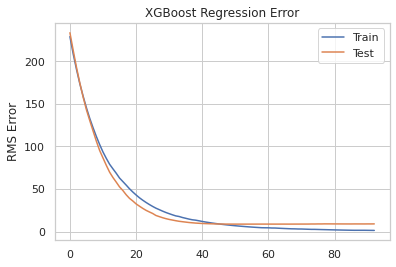

The root mean squared error is 8.930285549745875


In [332]:
df_n,lis=ipl.xg_boost_regressor()

{'validation_0': {'rmse': [230.261444, 209.458344, 191.284668, 174.106293, 158.595291, 144.904495, 131.756805, 120.836334, 110.94635, 101.569435, 92.79866, 85.211449, 78.141296, 71.70903, 66.579056, 61.221474, 56.544167, 52.182926, 48.314777, 44.967815, 41.708187, 38.701714, 35.945362, 33.531368, 31.222126, 29.155464, 27.290636, 25.516048, 23.856667, 22.401234, 20.974709, 20.134062, 18.894869, 17.782047, 16.723568, 16.243458, 15.301215, 14.405796, 13.582658, 12.808578, 12.097654, 11.425787, 10.805413, 10.230304, 9.678046, 9.162538, 8.672828, 8.486244, 8.3673, 7.939285, 7.789935, 7.652921, 7.265234, 6.898367, 6.552247, 6.224157, 5.913582, 5.620005, 5.344891, 5.08745, 4.842521, 4.781073, 4.719292, 4.49361, 4.439525, 4.234501, 4.035252, 3.843268, 3.665021, 3.49405, 3.337001, 3.186855, 3.041996, 2.904669, 2.77651, 2.678446, 2.562461, 2.452382, 2.348874, 2.252086, 2.25688, 2.164565, 2.079563, 1.997674, 1.922186, 1.849795, 1.780451, 1.759249, 1.695123, 1.631797, 1.570371, 1.515866, 1.464412,

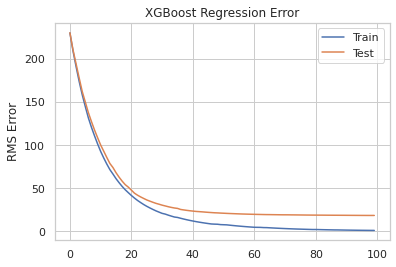

Cross validation score: 0.98 (+/- 0.06)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
0             160               155
4             165               168
10            184               209
12            141               123
18            143               129
22            101               107
30             81                84
31            183               179
33            311               290
39              9                11
44             15                15
45            156               138
53             26                25
70             98                95
73            593               527
76             98                95
77            405               413
80            510               490
83              9                10
90            405               413


The score of the training set is 0.9999513442136794
The score of the validation set is 0.9872171710741521
The explained variance score is 0.9

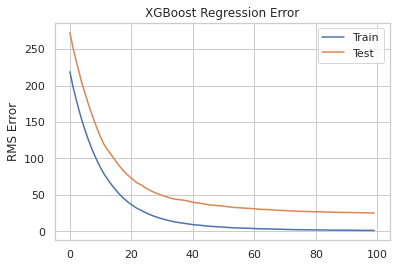

Cross validation score: 0.99 (+/- 0.01)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
5             521               506
9              90                93
11              9                10
15            442               440
16             25                26
26            463               448
28            398               395
35             46                43
40            490               504
42            692               584
47            123               136
55            110               109
65            282               275
66            211               201
69             48                60
72             18                18
85             32                35
88             21                26
93             14                15
96             64                66


The score of the training set is 0.9999261606331875
The score of the validation set is 0.985579169392268
The explained variance score is 0.98

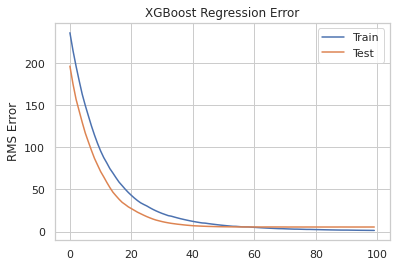

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
3             396               393
6             353               344
7              19                18
8              80                75
13             71                73
17             12                11
19             64                62
24             37                32
25             84                84
27            162               159
34             61                48
36            319               333
38             32                32
49             12                13
62            344               343
64             18                17
78             40                40
81             10                10
89            383               373
95            488               488


The score of the training set is 0.9996811616749685
The score of the validation set is 0.9988421479805073
The explained variance score is 0.9

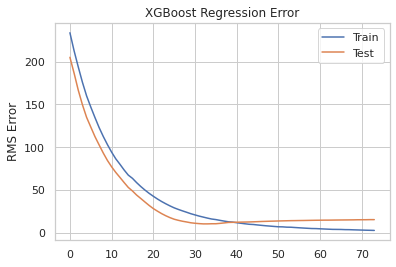

Cross validation score: 0.99 (+/- 0.03)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
32             18                16
41             20                16
43            344               332
46            529               539
48            253               254
50             42                43
54             95                90
56             14                13
57             11                12
58             73                68
59             12                12
61            416               388
67             34                32
68            244               256
75            342               322
79            279               277
94            220               199
97            115               103
98            296               301
99             67                60


The score of the training set is 0.9890112490281096
The score of the validation set is 0.9952766978027745
The explained variance score is 0.9

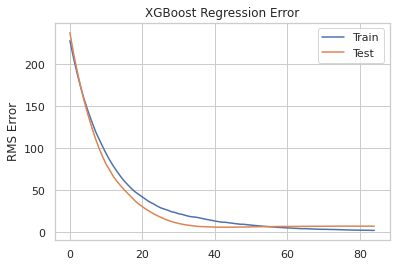

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
1             424               437
2              63                63
14            393               396
20             11                12
21             16                17
23             70                71
29            180               175
37            106               109
51            282               275
52            332               322
60             15                15
63            168               164
71             86                83
74            373               378
82            445               457
84             40                39
86            402               399
87            213               204
91            464               455
92             42                40


The score of the training set is 0.9953243794660659
The score of the validation set is 0.9985819987062569
The explained variance score is 0.9

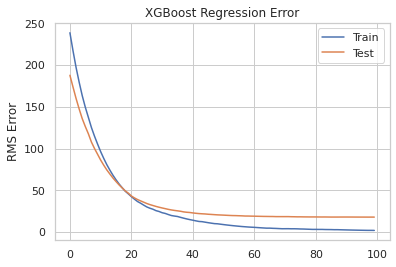

Cross validation score: 0.98 (+/- 0.05)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
15            442               444
16             25                24
17             12                11
20             11                11
25             84                85
30             81                85
37            106               107
39              9                10
49             12                13
54             95                96
55            110               106
56             14                14
59             12                11
65            282               286
66            211               181
73            593               525
79            279               265
87            213               185
93             14                13
99             67                60


The score of the training set is 0.9998628494597344
The score of the validation set is 0.9868663115585565
The explained variance score is 0.9

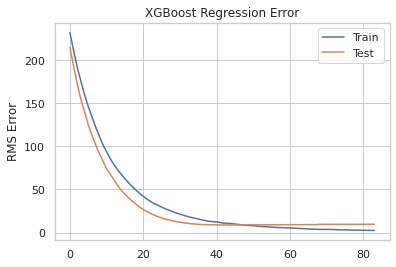

Cross validation score: 0.99 (+/- 0.03)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
9              90                92
18            143               153
23             70                68
24             37                32
48            253               244
53             26                25
57             11                12
58             73                69
60             15                15
63            168               172
74            373               388
75            342               315
76             98                96
82            445               451
83              9                12
86            402               393
88             21                25
89            383               381
90            405               396
98            296               307


The score of the training set is 0.9961764435286956
The score of the validation set is 0.9968988029990212
The explained variance score is 0.9

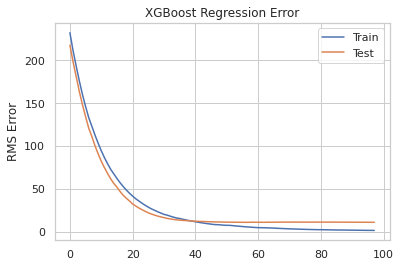

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
1             424               441
5             521               503
10            184               209
12            141               123
19             64                63
21             16                17
28            398               394
29            180               166
31            183               167
35             46                42
45            156               149
52            332               340
67             34                36
68            244               252
69             48                59
78             40                38
81             10                11
85             32                37
91            464               459
92             42                38


The score of the training set is 0.998948379026519
The score of the validation set is 0.9954354427141494
The explained variance score is 0.99

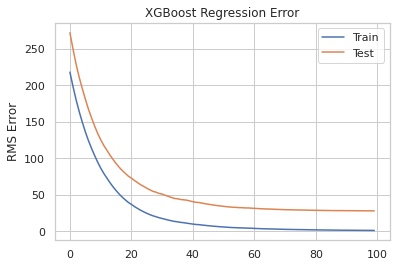

Cross validation score: 0.99 (+/- 0.01)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
0             160               155
2              63                64
3             396               388
8              80                72
13             71                68
14            393               390
26            463               445
38             32                34
41             20                18
42            692               584
44             15                15
46            529               587
50             42                44
51            282               282
62            344               346
64             18                15
70             98                94
77            405               410
84             40                40
94            220               212


The score of the training set is 0.9999521198070399
The score of the validation set is 0.9805033031822751
The explained variance score is 0.9

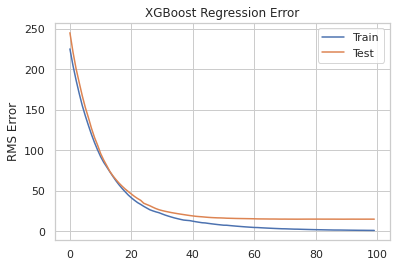

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
4             165               167
6             353               340
7              19                18
11              9                10
22            101               108
27            162               160
32             18                18
33            311               294
34             61                49
36            319               328
40            490               460
43            344               343
47            123               140
61            416               407
71             86                84
72             18                17
80            510               465
95            488               463
96             64                65
97            115               108


The score of the training set is 0.999907567950437
The score of the validation set is 0.9922547343983381
The explained variance score is 0.99

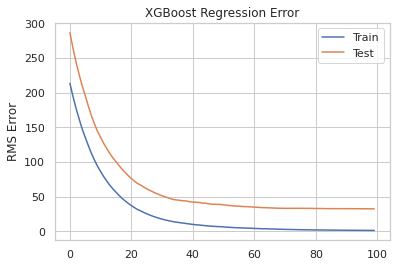

Cross validation score: 0.99 (+/- 0.01)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
9              90                94
12            141               132
13             71                70
14            393               393
20             11                12
21             16                18
26            463               445
28            398               394
40            490               511
42            692               564
44             15                17
45            156               159
46            529               587
48            253               247
60             15                17
61            416               412
75            342               332
83              9                10
85             32                37
93             14                14


The score of the training set is 0.9999375587611599
The score of the validation set is 0.9769317091973352
The explained variance score is 0.9

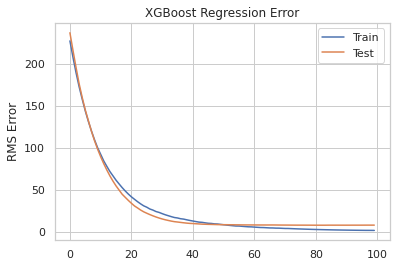

Cross validation score: 0.98 (+/- 0.03)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
3             396               392
5             521               513
7              19                17
8              80                77
33            311               294
47            123               141
50             42                44
53             26                26
57             11                11
62            344               350
65            282               282
71             86                86
77            405               408
81             10                10
82            445               460
84             40                41
86            402               395
87            213               206
88             21                26
94            220               209


The score of the training set is 0.9998045430894121
The score of the validation set is 0.9979368802819624
The explained variance score is 0.9

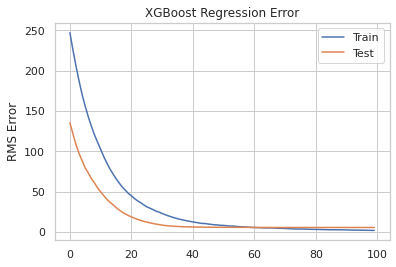

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
4             165               164
6             353               344
11              9                10
22            101               103
24             37                32
25             84                87
27            162               161
29            180               179
30             81                88
34             61                48
36            319               334
41             20                18
49             12                14
56             14                13
59             12                11
78             40                37
79            279               278
92             42                37
97            115               108
99             67                65


The score of the training set is 0.9994186988694566
The score of the validation set is 0.9970243733723946
The explained variance score is 0.9

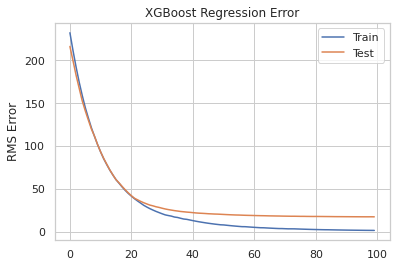

Cross validation score: 0.98 (+/- 0.08)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
2              63                65
10            184               213
15            442               443
17             12                11
19             64                64
32             18                17
35             46                44
38             32                33
39              9                10
51            282               297
58             73                72
63            168               165
64             18                15
66            211               213
70             98                95
72             18                16
73            593               527
76             98                99
80            510               491
98            296               309


The score of the training set is 0.9999282905627702
The score of the validation set is 0.989903675903513
The explained variance score is 0.99

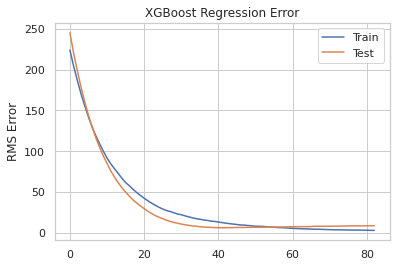

Cross validation score: 0.99 (+/- 0.02)
The table showing both the actual and the predicted values:

    Actual_values  Predicted_values
0             160               159
1             424               435
16             25                24
18            143               145
23             70                69
31            183               176
37            106               110
43            344               344
52            332               328
54             95                95
55            110               110
67             34                33
68            244               249
69             48                59
74            373               385
89            383               385
90            405               402
91            464               451
95            488               483
96             64                65


The score of the training set is 0.9950610245147654
The score of the validation set is 0.9985434759788469
The explained variance score is 0.9

In [333]:
df_cv=ipl.xg_cv ()

In [334]:
ipl.svm_svr()

(    Predicted_values_Answer
 0                       366
 1                       442
 2                       451
 3                       420
 4                       339
 ..                      ...
 95                       16
 96                      139
 97                        8
 98                       17
 99                        3
 
 [100 rows x 1 columns],
 [0.9798610793406096,
  18.9,
  531.9,
  23.062957312539083,
  0.038298719069153456,
  0.9797636832683535,
  0.9450728545855309,
  0.8538461407792364])

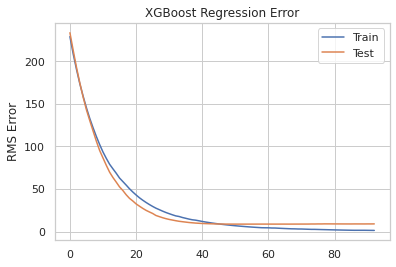

The root mean squared error is 8.930285549745875


,Model name,explained_Variance_Score,mean_Absolute_Error,mean_Squared_Error,root_Mean_Squared_Error,mean_Squared_Log_Error,r2_Score,adjusted_r_squared,cross_validation_score
0,XGB,0.996974,6.85,79.75,8.930286,0.004775,0.996966,0.991765,0.989065
1,Gradient Boosting,0.993382,10.10,174.60,13.213629,0.007577,0.993357,0.981970,0.982150
2,Extra Trees,0.991460,11.40,224.50,14.983324,0.012246,0.991459,0.976817,0.983016
3,Ada Boost,0.990621,13.05,270.05,16.433198,0.015350,0.989726,0.972113,0.980212
4,Random Forest,0.989500,13.35,276.55,16.629793,0.010909,0.989479,0.971442,0.982210
5,SVR,0.979861,18.90,531.90,23.062957,0.038299,0.979764,0.945073,0.853846
6,SGD,0.978992,18.55,555.25,23.563743,0.179784,0.978875,0.942662,0.971424
7,Ridge,0.978162,19.35,574.05,23.959341,0.087361,0.978160,0.940720,0.973241
8,Bayesian Ridge,0.977404,19.65,594.65,24.385446,0.069645,0.977376,0.938593,0.973732
9,Linear,0.975684,20.30,644.90,25.394881,0.055583,0.975465,0.933404,0.973445


In [335]:
ipl.result_table()

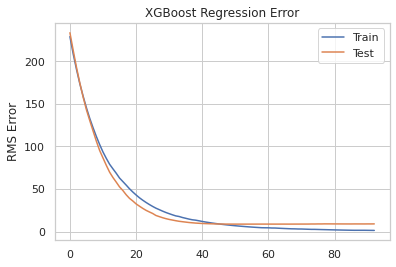

The root mean squared error is 8.930285549745875


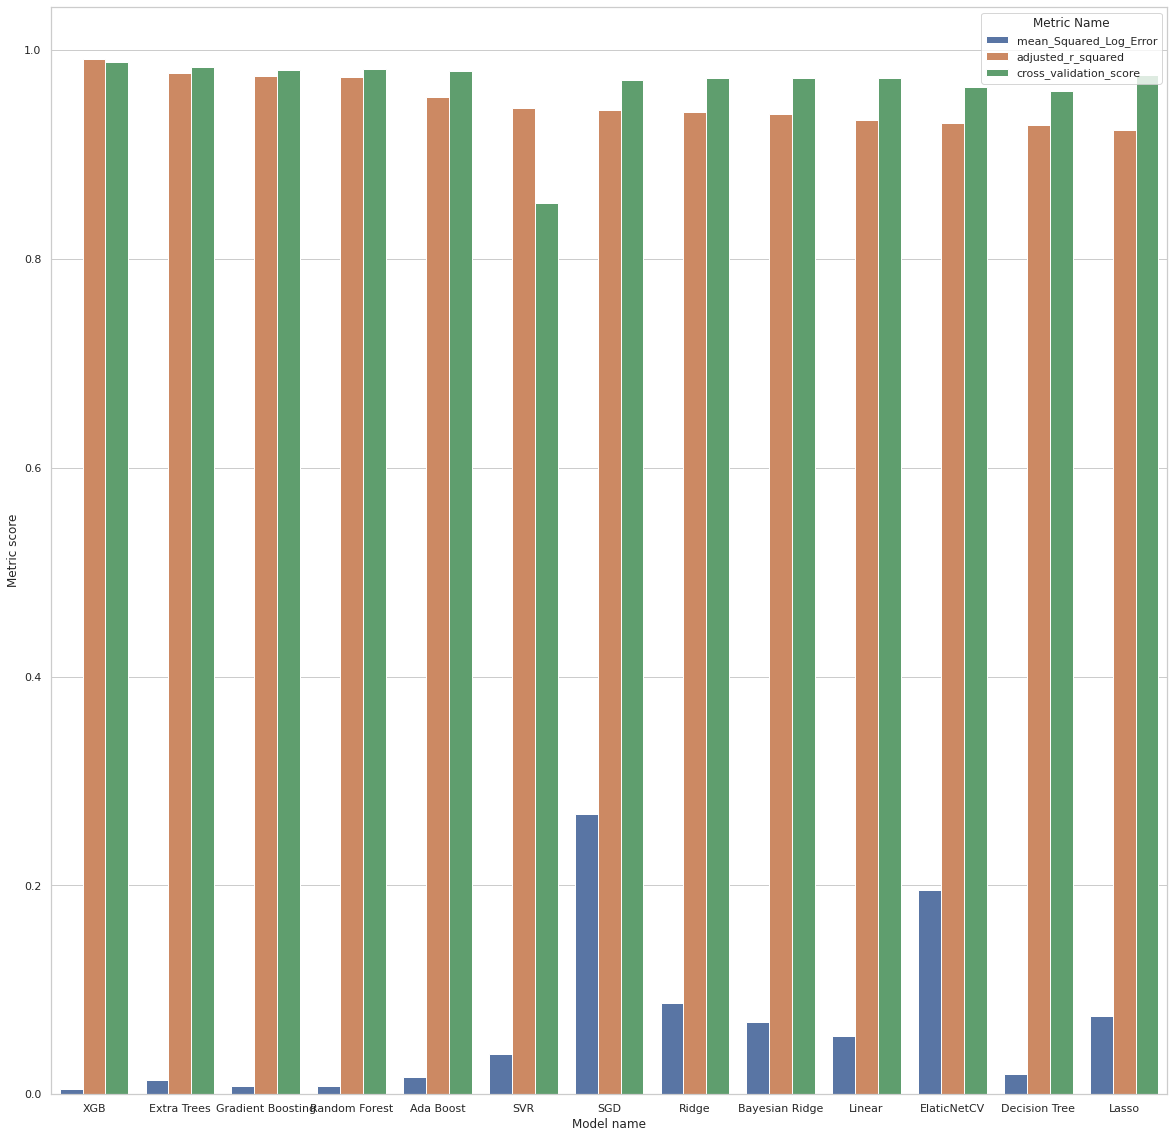

In [336]:
ipl.result_plot()

In [337]:
# ipl.ann_1()

In [338]:
df_f=pd.DataFrame({'PLAYER':df1['PLAYER'],'2018_Total_Runs':df1['2018_Runs'],'2019_Total_Runs':df2['2019_Runs'],'2020_Total_Runs':df_cv['Predicted_values_Answer'], '2020_runs':df_n['Predicted_values_Answer']})

In [339]:
df_f

,PLAYER,2018_Total_Runs,2019_Total_Runs,2020_Total_Runs,2020_runs
0,Aaron Finch,134,692,585,578
1,AB de Villiers,480,593,521,512
2,Abhishek Sharma,63,529,507,504
3,Ajinkya Rahane,370,521,489,504
4,Alex Hales,148,510,486,465
...,...,...,...,...,...
95,Virat Kohli,530,11,10,11
96,Washington Sundar,65,10,10,11
97,Wriddhiman Saha,122,9,10,11
98,Yusuf Pathan,260,9,10,11


In [340]:
df_final=pd.DataFrame({'PLAYER':df_f['PLAYER'],'2020_Total_Runs':df_f['2020_Total_Runs']})

In [341]:
df_final

,PLAYER,2020_Total_Runs
0,Aaron Finch,585
1,AB de Villiers,521
2,Abhishek Sharma,507
3,Ajinkya Rahane,489
4,Alex Hales,486
...,...,...
95,Virat Kohli,10
96,Washington Sundar,10
97,Wriddhiman Saha,10
98,Yusuf Pathan,10


In [342]:
df_final.to_excel(r"C:\Users\sayan\OneDrive\Desktop\Data_final_answer_flipr.xlsx",index=False, encoding='utf-8')